In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train,_),_=tf.keras.datasets.mnist.load_data()

In [ ]:
x_train=x_train/255.0*2-1

In [ ]:
batch_size=32
latent_dim=100
d=28*28

In [ ]:
x_train=x_train.reshape(-1,d)

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
def build_generator(latent_dim):
  input_=tf.keras.layers.Input(shape=(latent_dim,))
  x=tf.keras.layers.Dense(256,activation=tf.keras.layers.LeakyReLU(alpha=0.2))(input_)
  x=tf.keras.layers.BatchNormalization(momentum=0.8)(x)
  x=tf.keras.layers.Dense(512,activation=tf.keras.layers.LeakyReLU(alpha=0.2))(x)
  x=tf.keras.layers.BatchNormalization(momentum=0.8)(x)
  x=tf.keras.layers.Dense(1024,activation=tf.keras.layers.LeakyReLU(alpha=0.2))(x)
  x=tf.keras.layers.BatchNormalization(momentum=0.8)(x)
  x=tf.keras.layers.Dense(d,activation="tanh")(x)
  gen_model=tf.keras.Model(input_,x)

  return gen_model

In [ ]:
def build_disc(shape):
  input_=tf.keras.layers.Input(shape=(shape,))
  x=tf.keras.layers.Dense(512,activation=tf.keras.layers.LeakyReLU(alpha=0.2))(input_)

  x=tf.keras.layers.Dense(256,activation=tf.keras.layers.LeakyReLU(alpha=0.2))(x)
  x=tf.keras.layers.Dense(1,activation="sigmoid")(x)
  disc_model=tf.keras.Model(input_,x)
  disc_model.compile(loss=tf.keras.losses.binary_crossentropy,metrics=["accuracy"])
  return disc_model

In [ ]:
gen_model=build_generator(latent_dim)

In [ ]:
disc_model=build_disc(d)

In [ ]:
z=tf.keras.layers.Input(shape=(latent_dim,))
fake_img=gen_model(z)
disc_model.trainable=False
combine_model=tf.keras.Model(z,disc_model(fake_img))
combine_model.compile(loss=tf.keras.losses.binary_crossentropy)

In [ ]:
def show_sample(image):
  t=0
  image=image*0.5+0.5
  fig,axes=plt.subplots(8,4,figsize=(15, 15))
  for i in range(8):
    for j in range(4):
        
        axes[i,j].imshow(image[t].reshape(28,28),cmap="gray")
        axes[i,j].axis('off')
        t+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


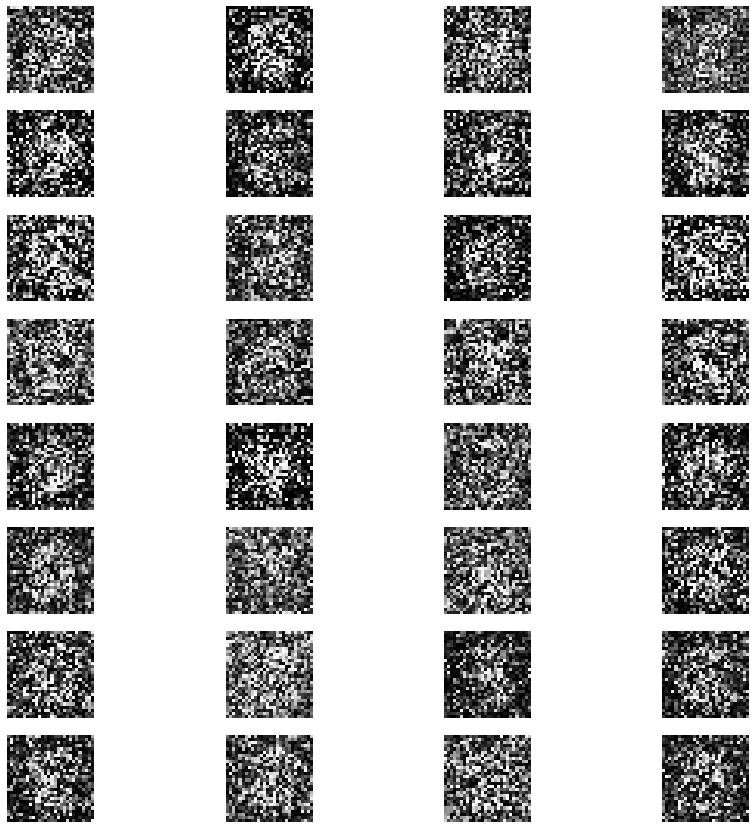

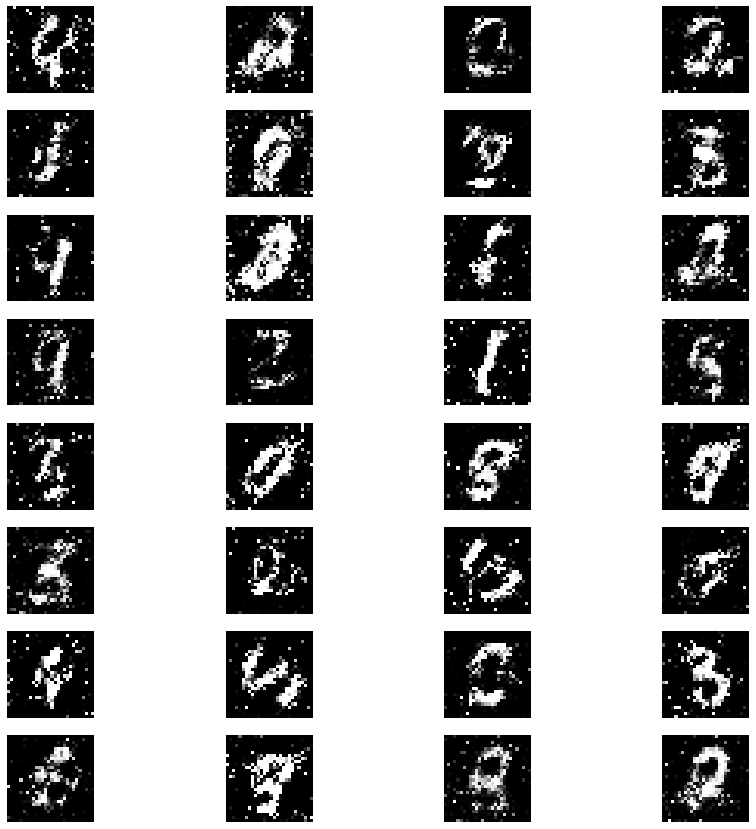

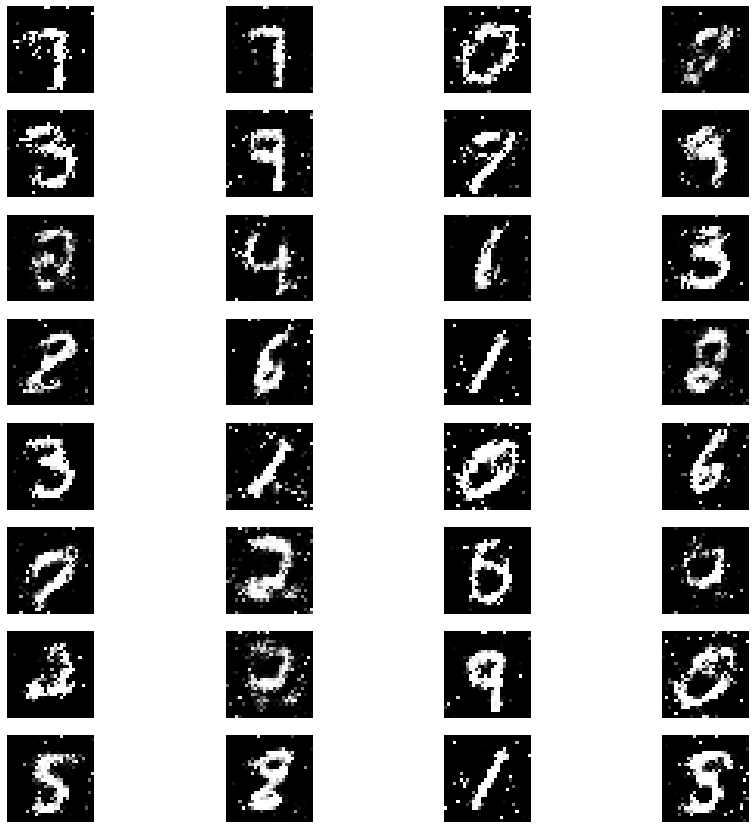

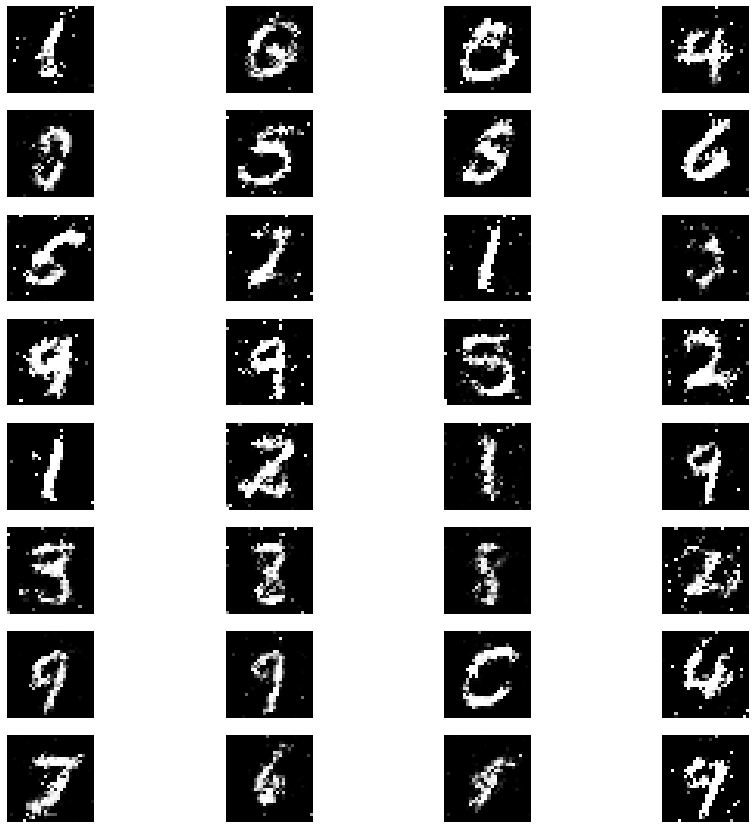

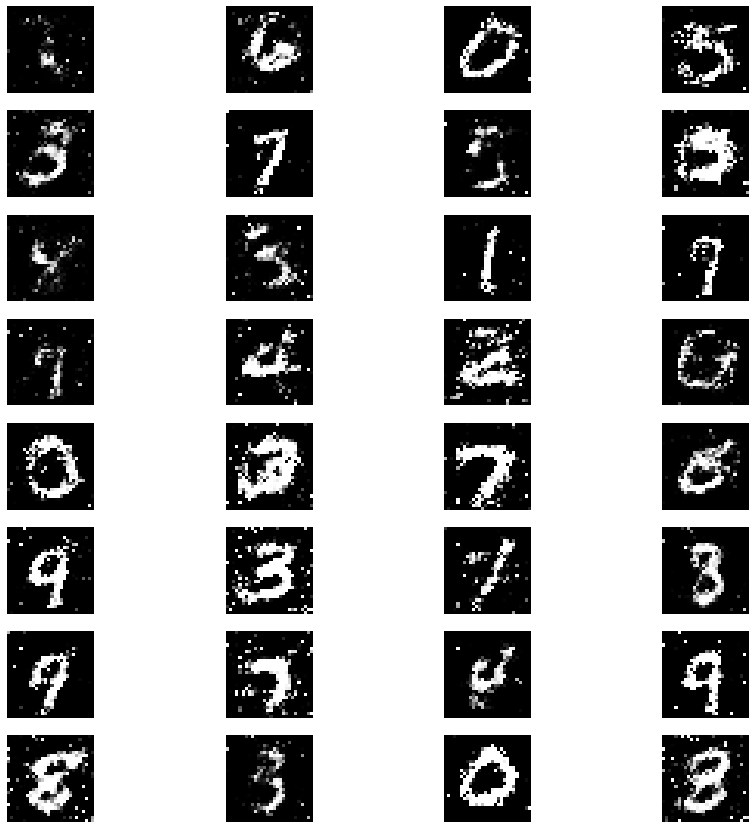

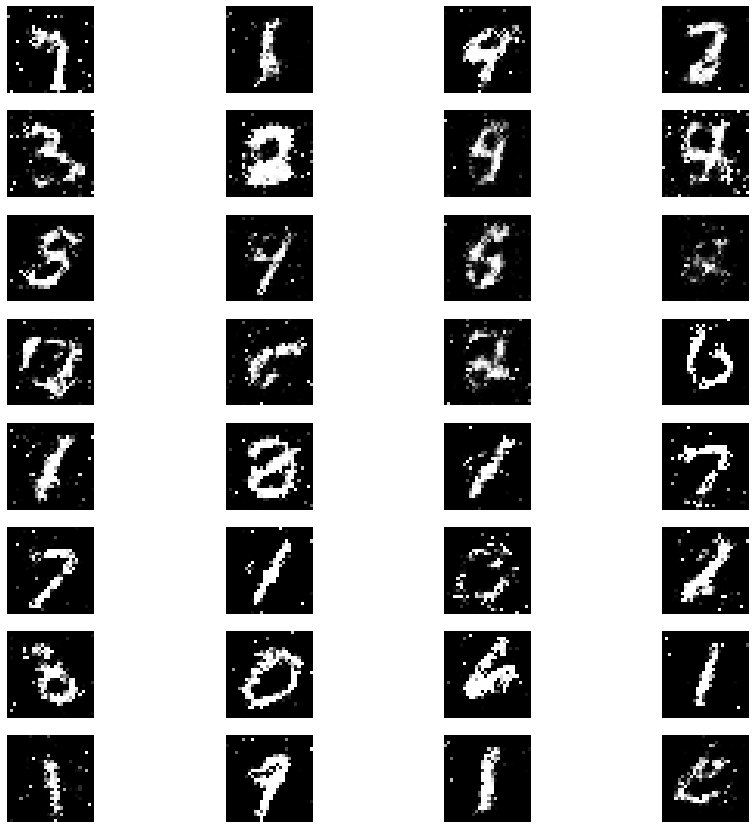

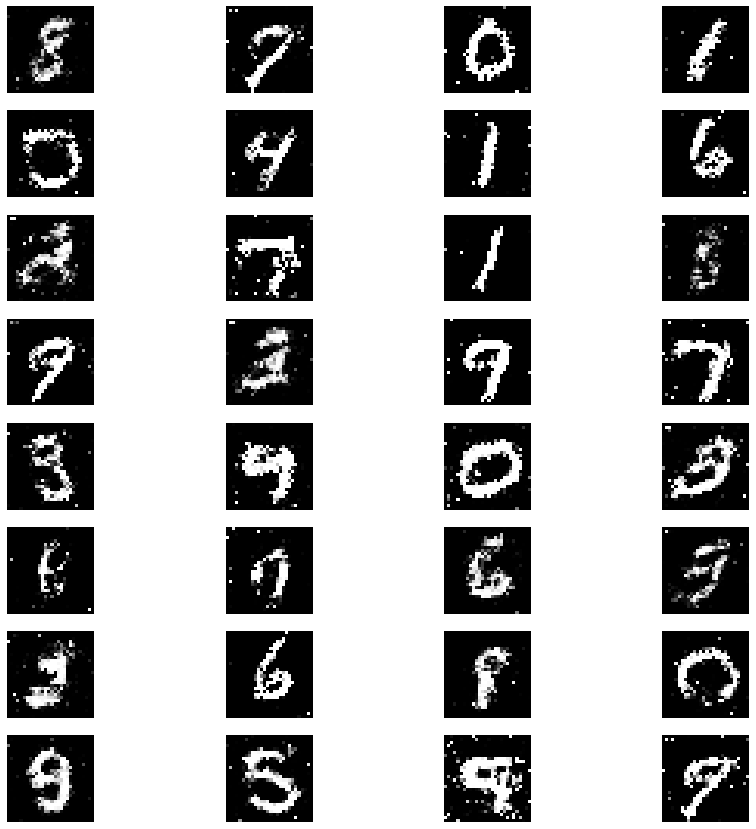

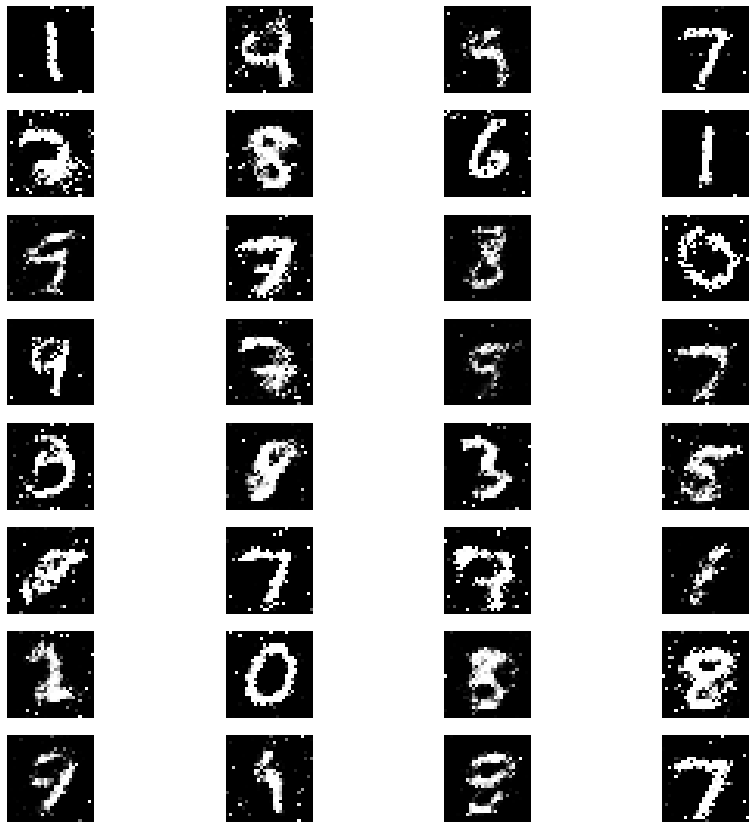

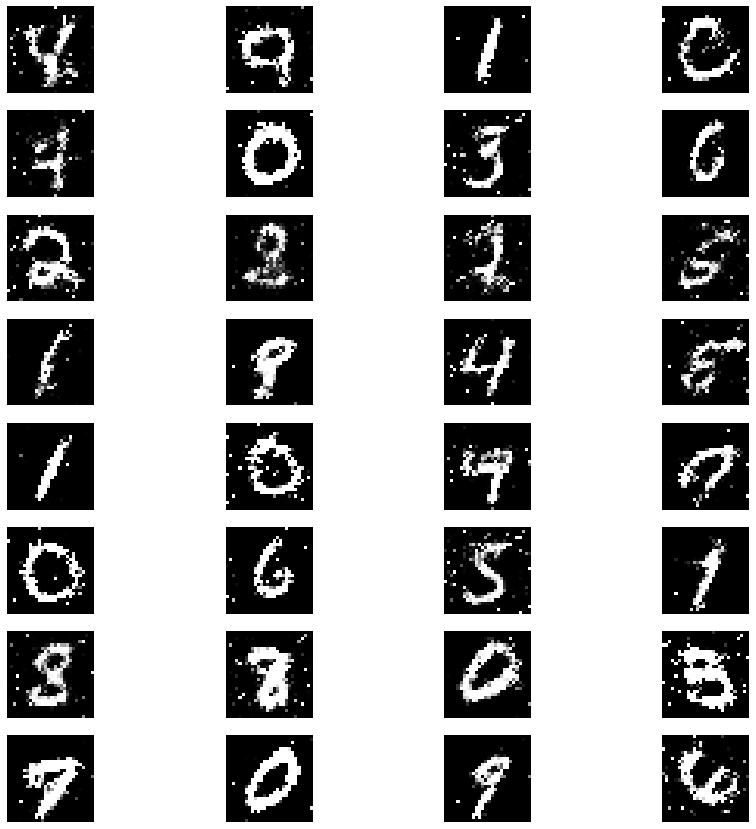

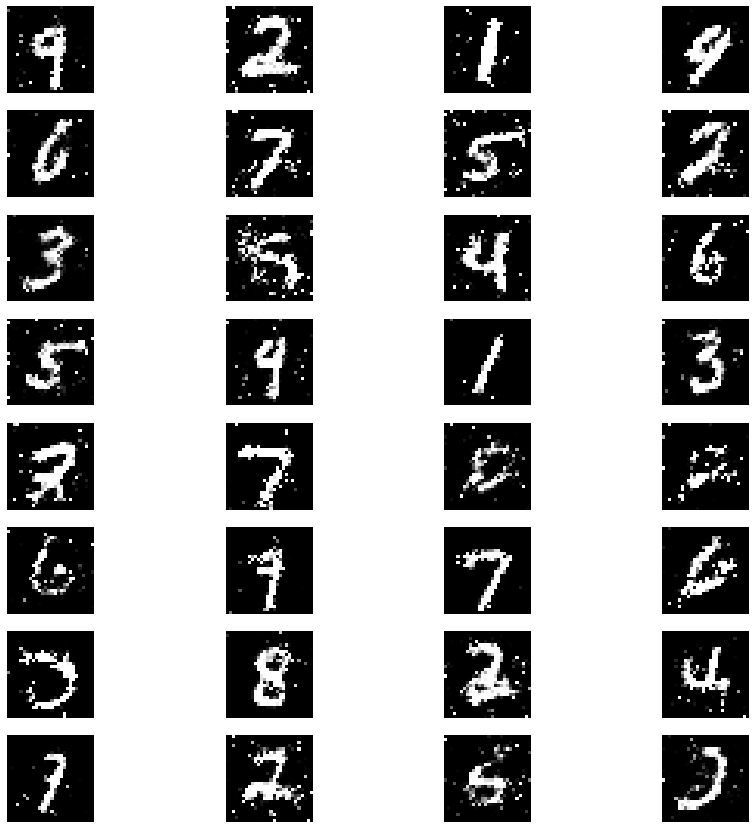

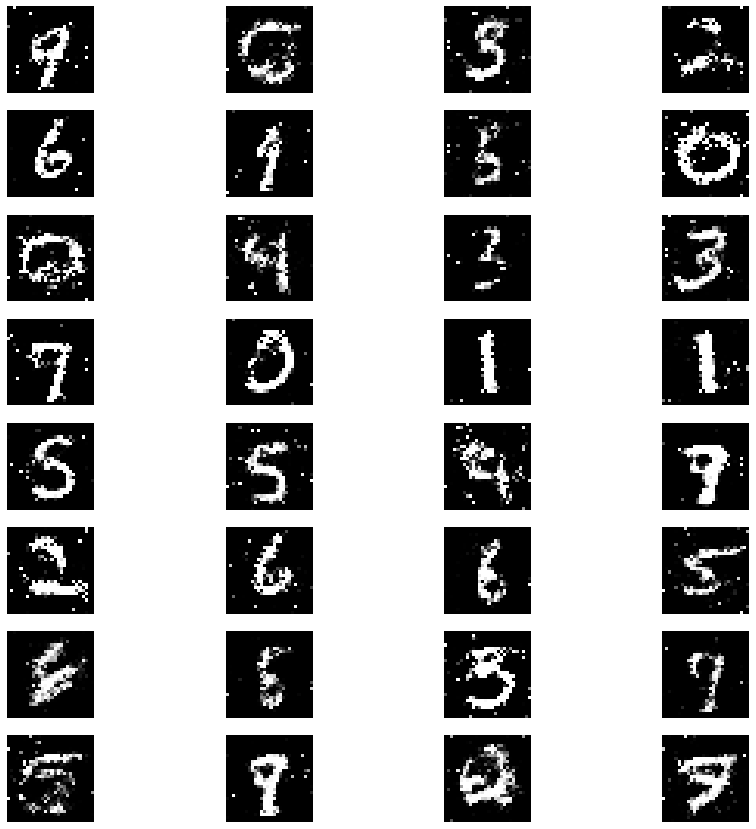

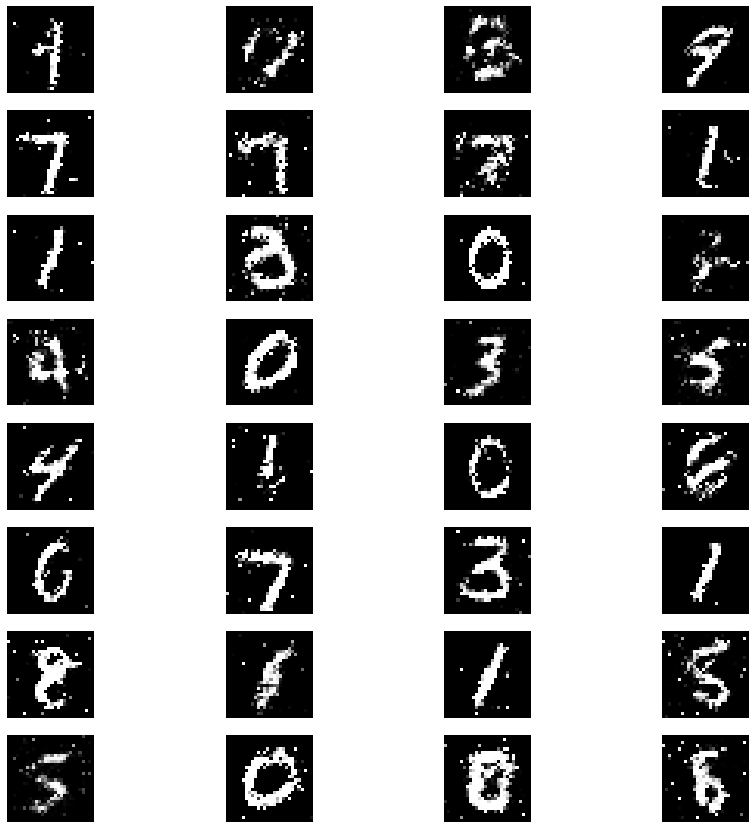

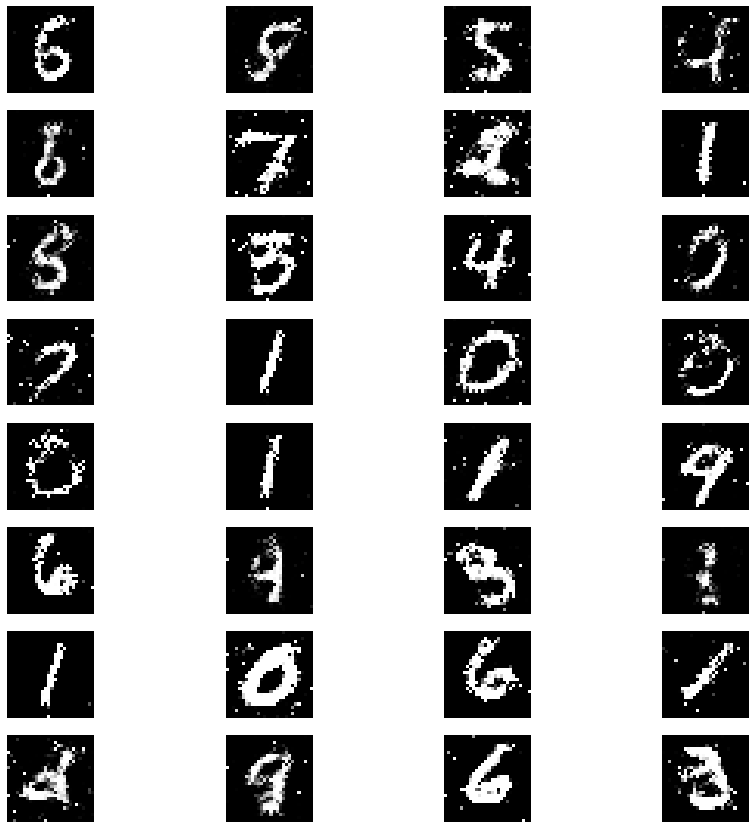

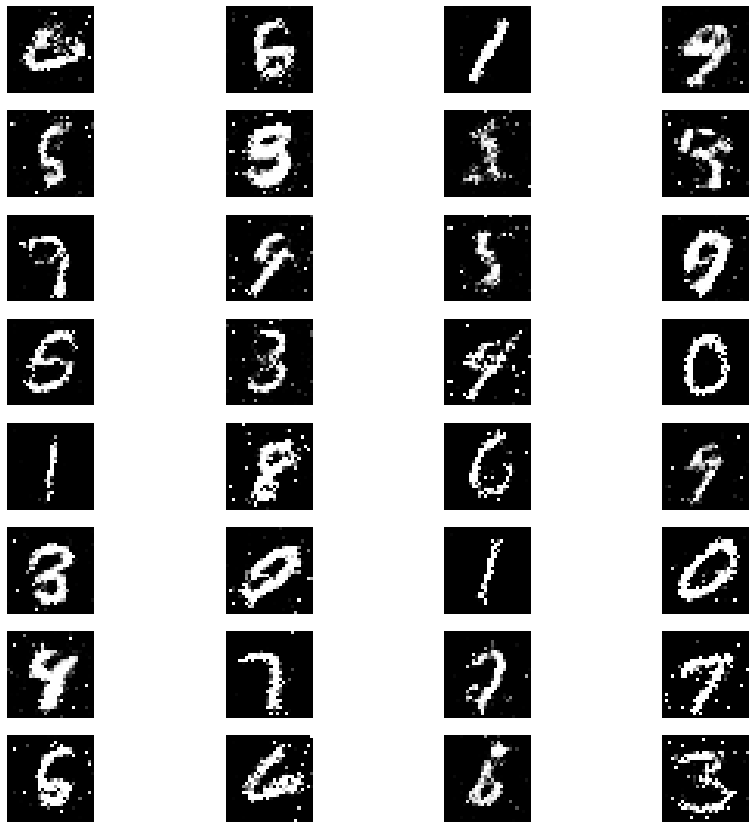

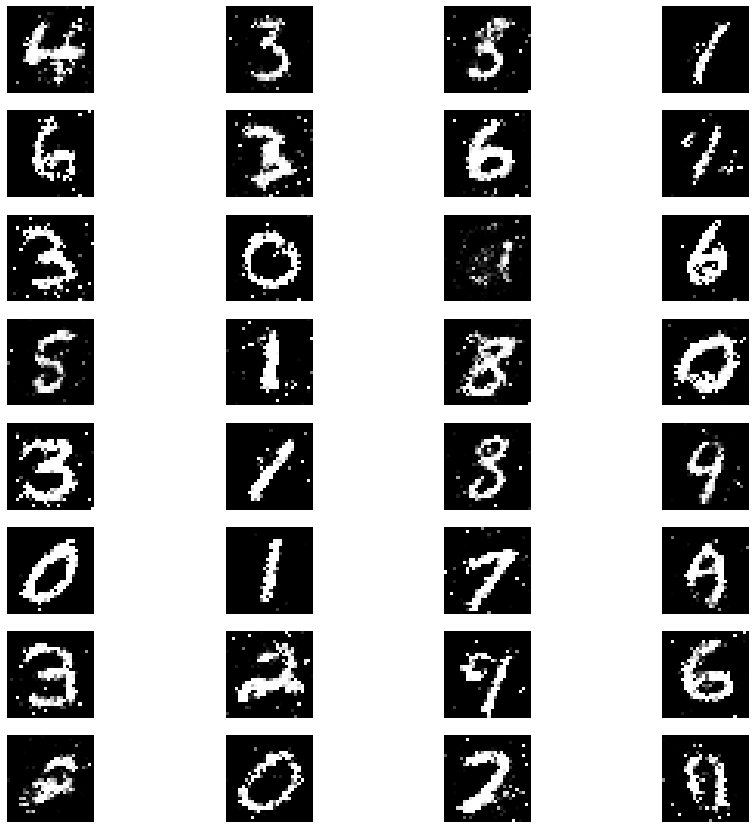

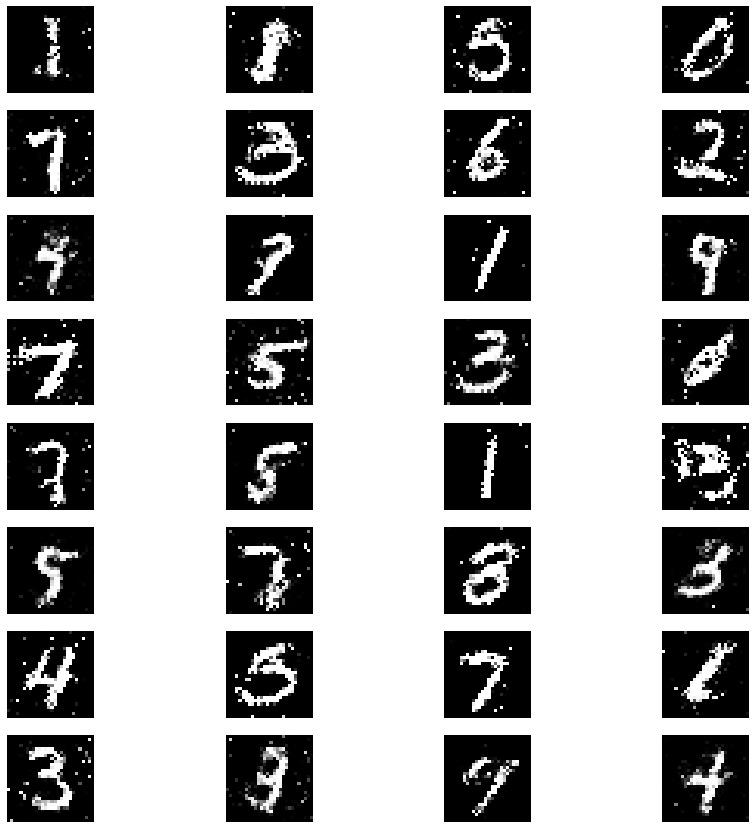

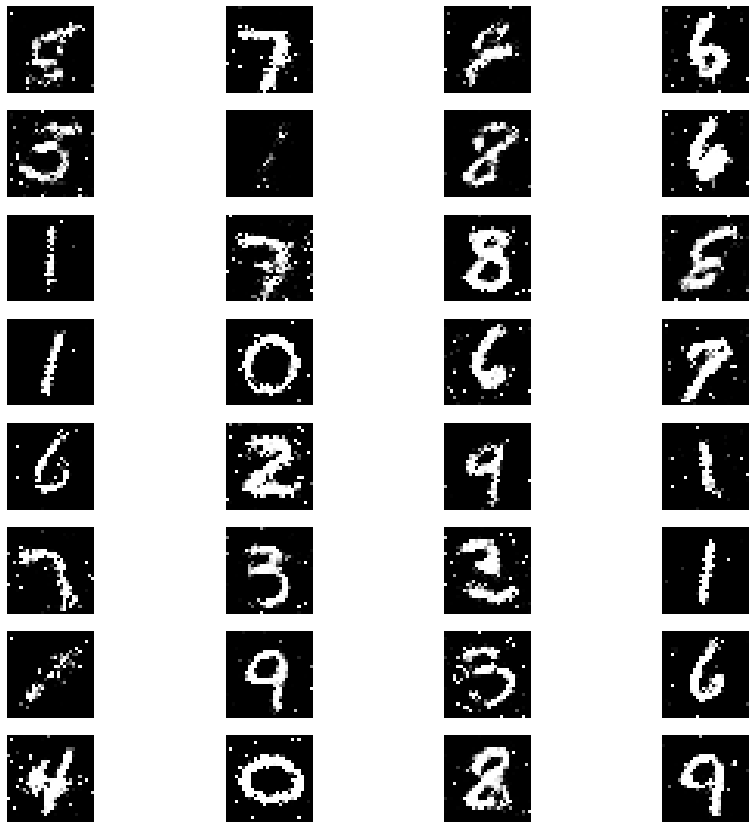

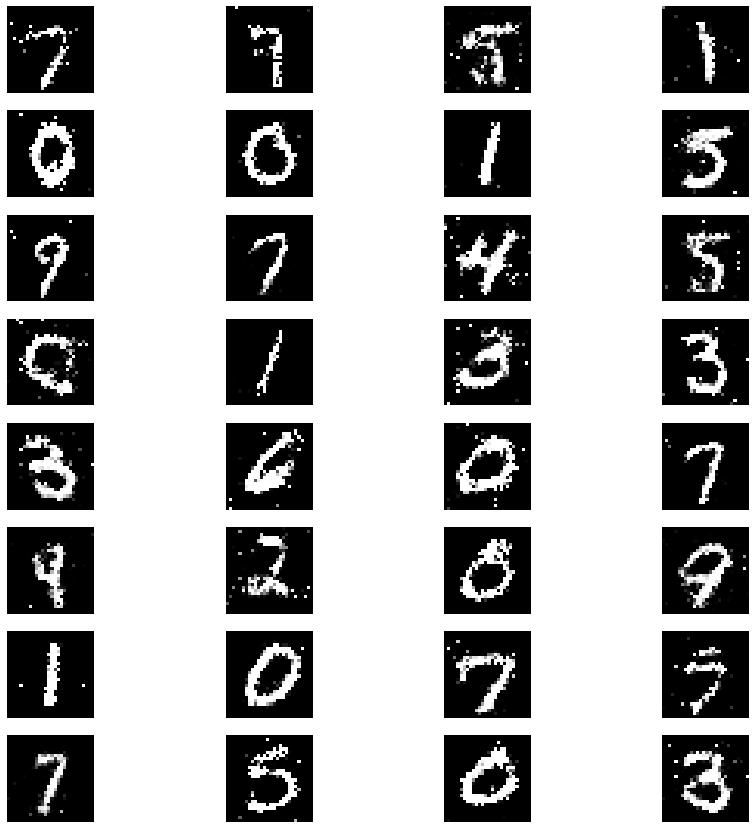

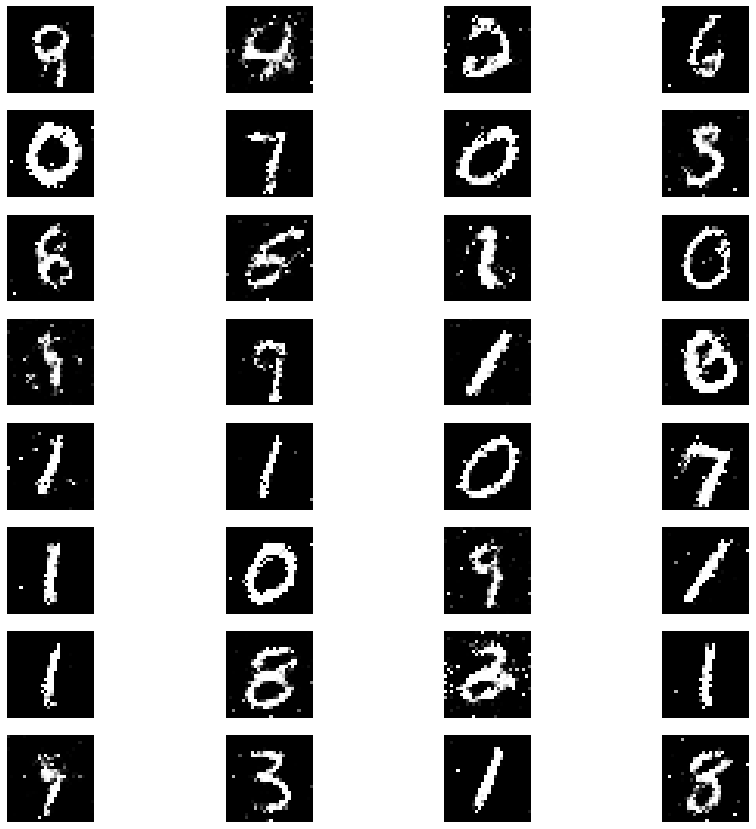

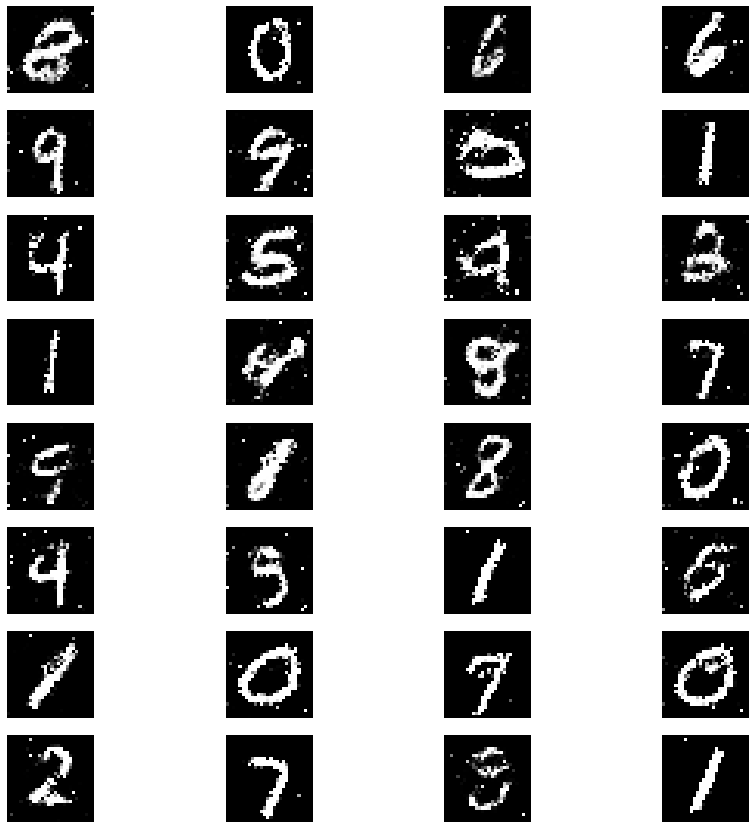

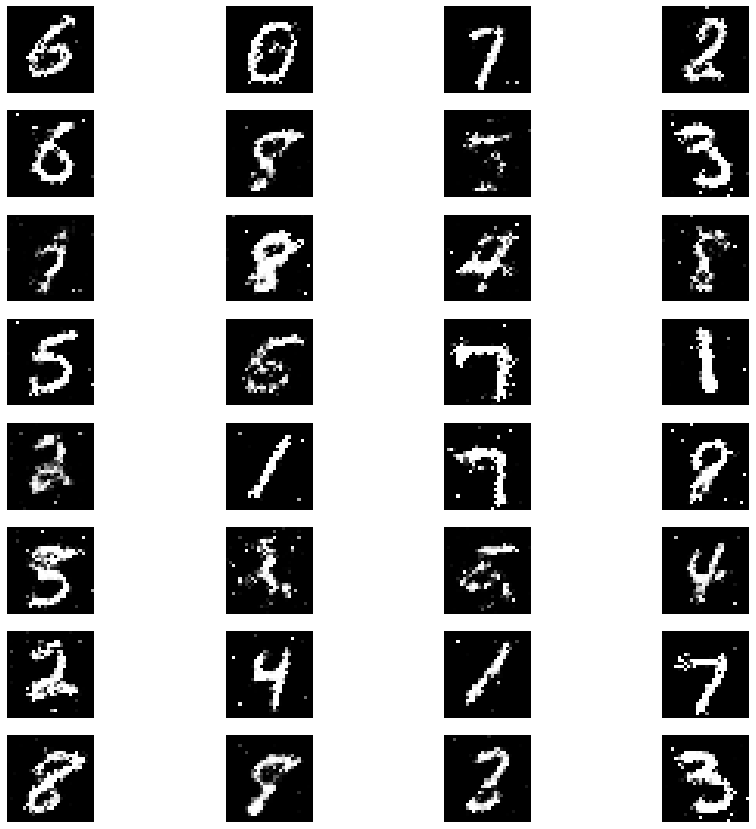

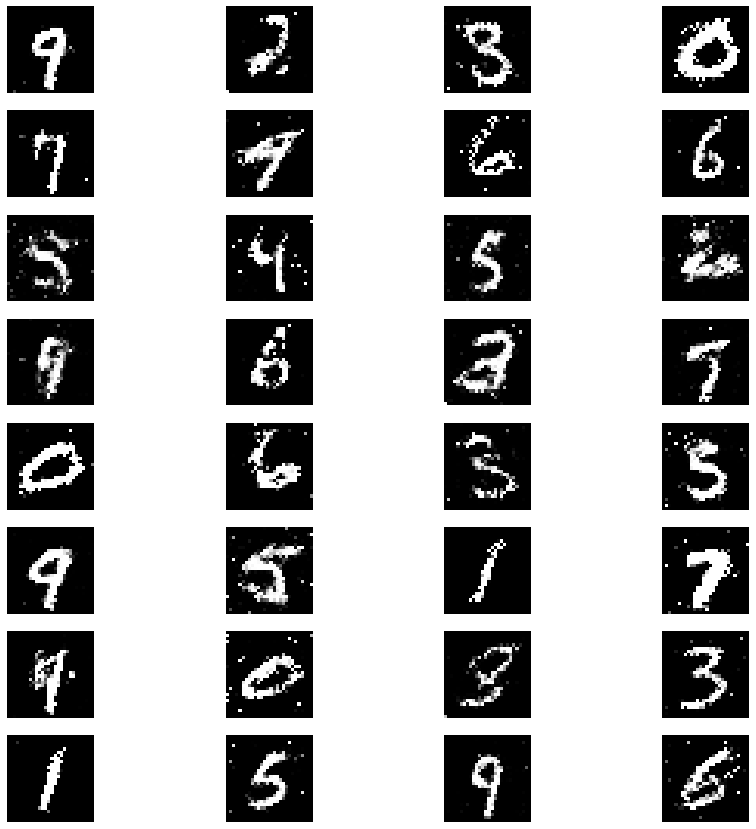

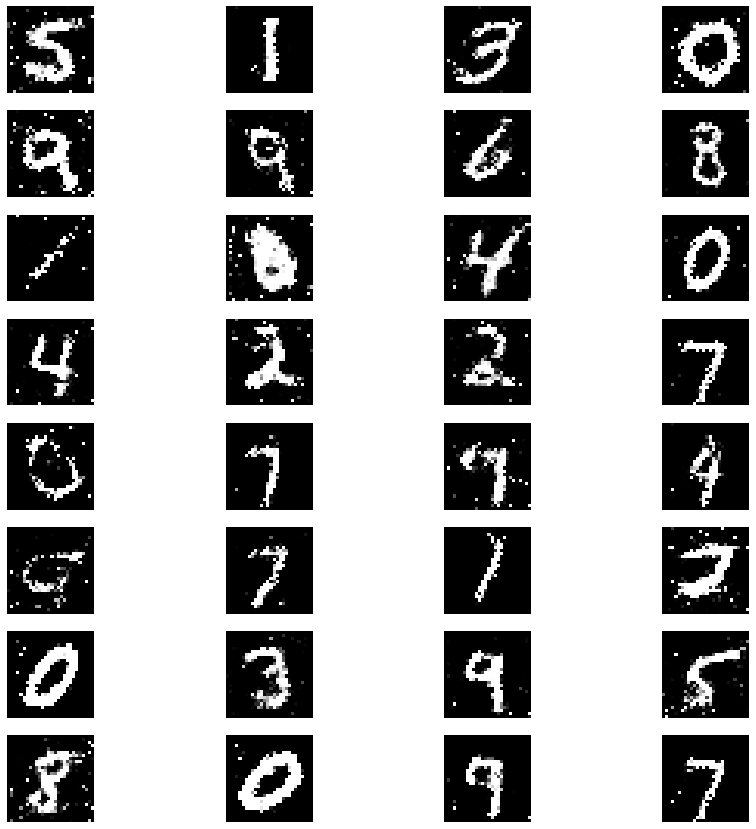

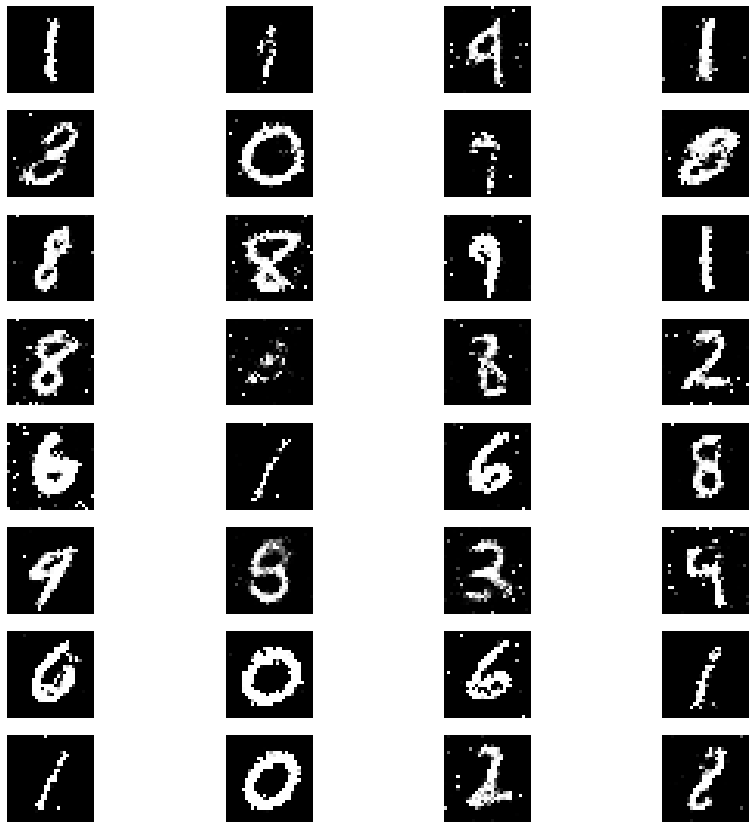

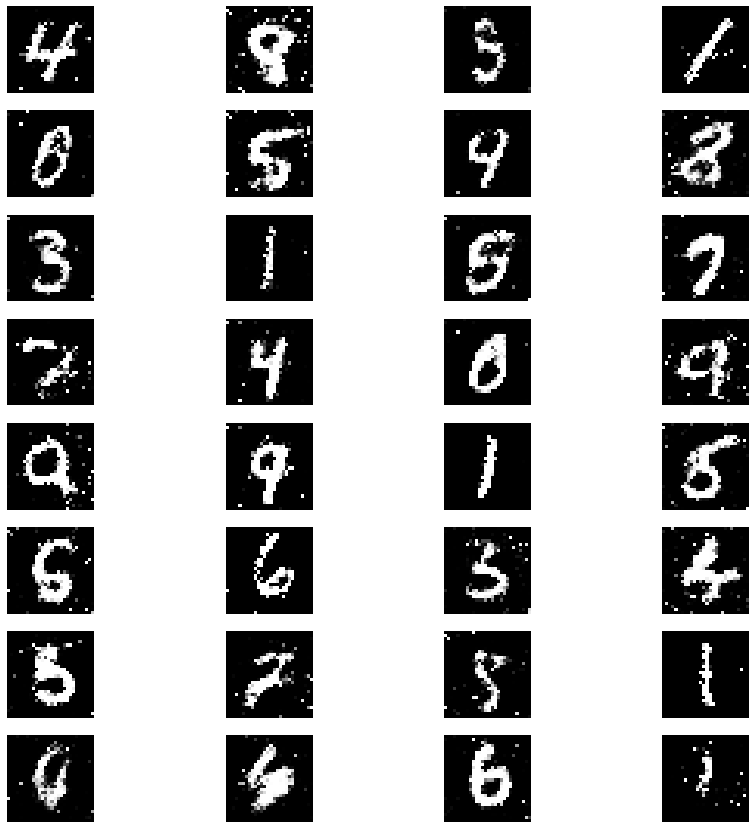

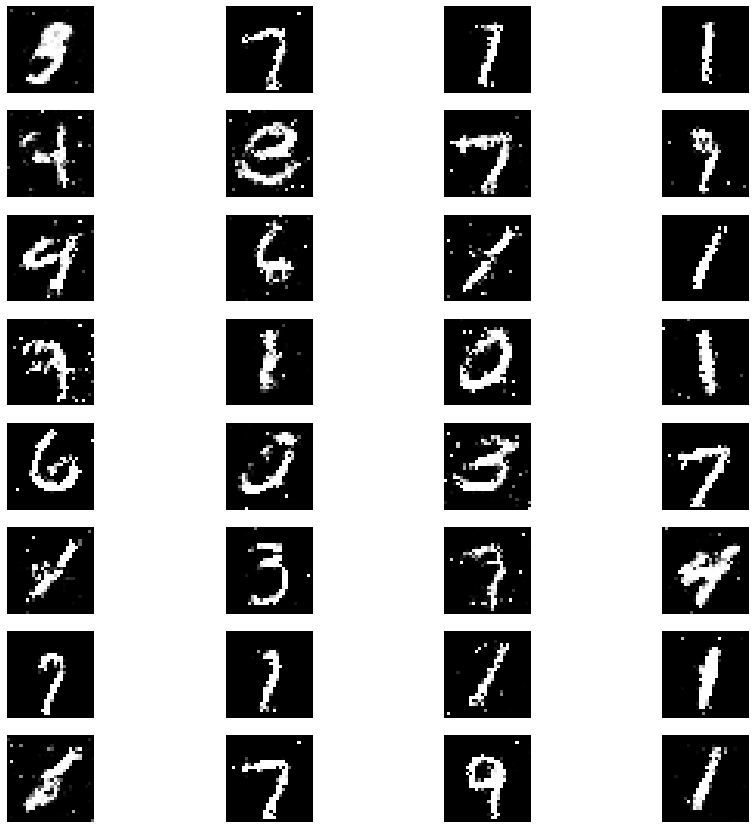

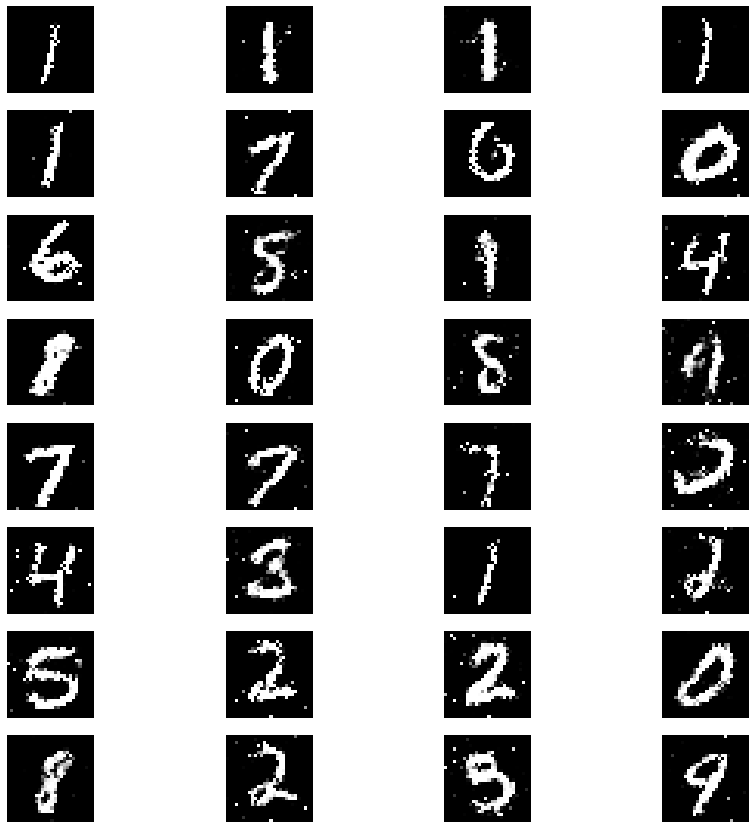

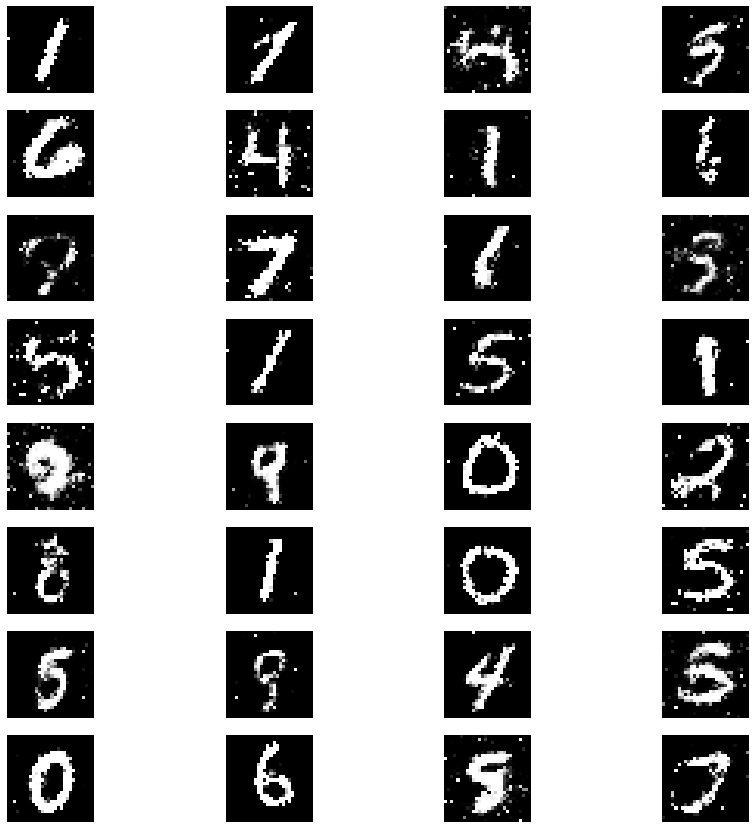

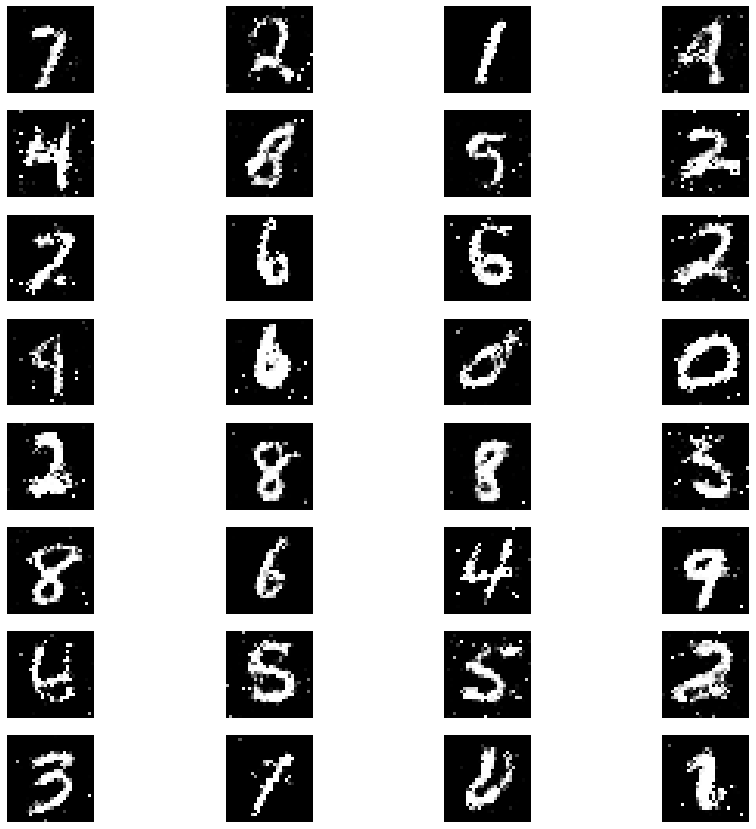

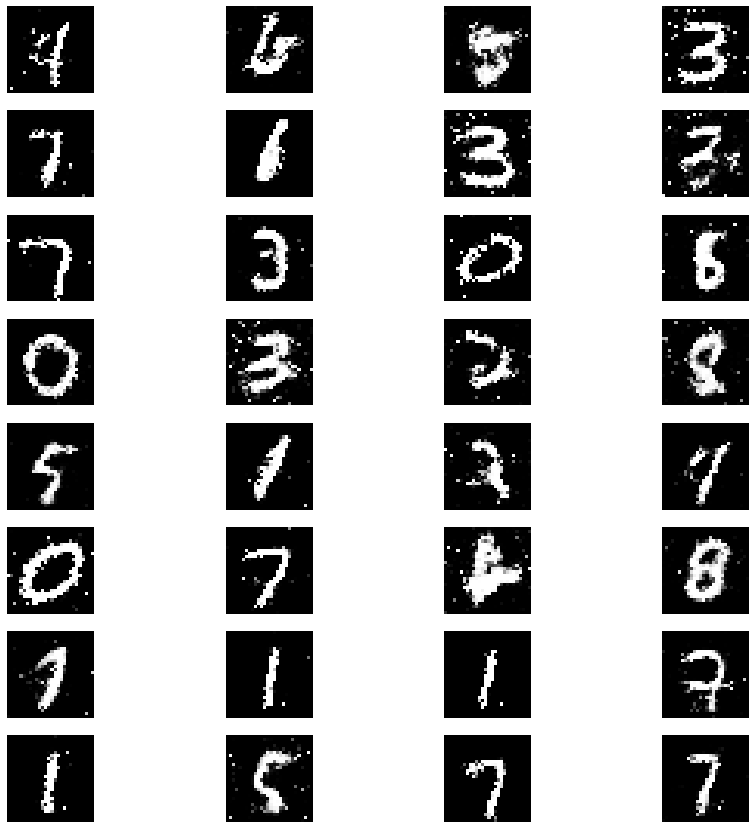

In [ ]:
d_losses=[]
d_accuracy=[]
g_losses=[]
for i in range(30000):
  idx=np.random.randint(0,x_train.shape[0],batch_size)
  real_images=x_train[idx]
  noise=np.random.randn(batch_size,latent_dim)
  fake_images=gen_model.predict(noise)
  real_loss,real_accuracy=disc_model.train_on_batch(real_images,np.ones((batch_size,1)))
  fake_loss,fake_accuracy=disc_model.train_on_batch(fake_images,np.zeros((batch_size,1)))
  d_losses.append(0.5*(real_loss+fake_loss))
  d_accuracy.append(0.5*(real_accuracy+fake_accuracy))
  if i%1000==0:
     show_sample(fake_images)
  noise=np.random.randn(batch_size,latent_dim)
  g_loss=combine_model.train_on_batch(noise,np.ones((batch_size,1)))
  g_losses.append(g_loss)

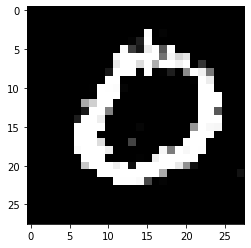

In [ ]:
plt.imshow(fake_images[1].reshape(28,28)*0.5+0.5,cmap="gray")

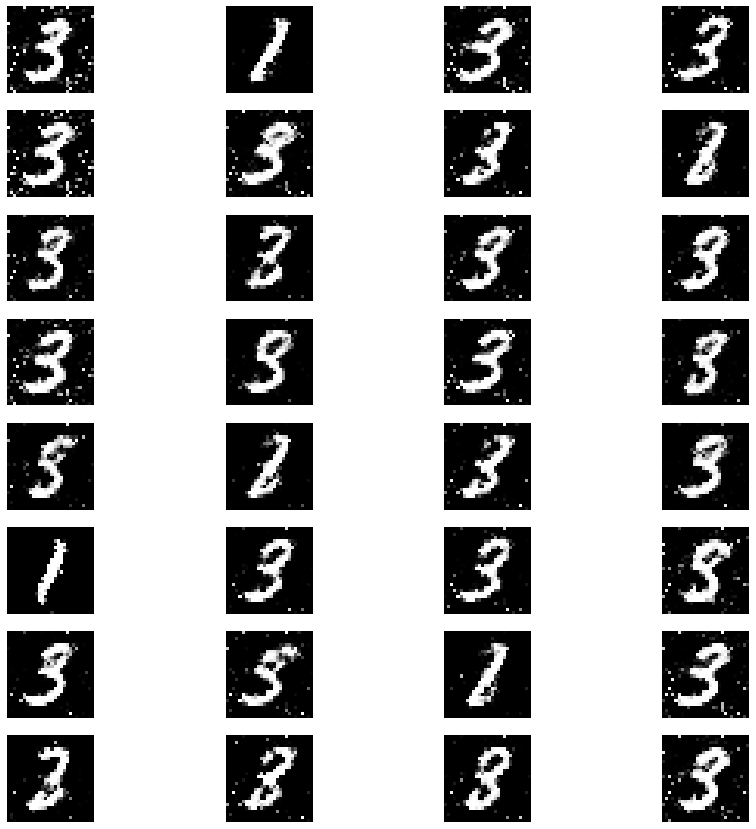

In [ ]:
show_sample(gen_model.predict(np.random.rand(batch_size,100)))